## Клиенты авиакомпании

_Целевая переменная_ (таргет) – `satisfaction` (удовлетворенность клиента полетом), бинарная (_satisfied_ или _neutral or dissatisfied_)

### Признаки
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)

Признаки, перечисленные ниже, являются числовыми. По смыслу они категориальные: клиент ставил оценку от 1-го до 5-ти включительно. Есть выбросы!
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

### Импорт либ

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(22,8)}, style="whitegrid")

### Чтение набора данных

In [2]:
#df = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv')
df = pd.read_csv('clients.csv')
df.head()

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


### Преобразуем названия колонок для работы

In [3]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.replace("/", "_")
df.columns = df.columns.str.lower()
df

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28.0,Loyal Customer,Personal Travel,Eco Plus,447.0,2.0,3.0,4.0,...,4.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,-
129876,129877,Male,41.0,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,0.0,3.0,...,3.0,2.0,2.0,5.0,5.0,5.0,5.0,NaN,2.0,-
129877,129878,Male,42.0,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,14.0,2.0,...,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,neutral or dissatisfied
129878,129879,Male,50.0,Loyal Customer,Personal Travel,Eco Plus,337.0,31.0,22.0,5.0,...,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,satisfied


In [4]:
df.shape

(129880, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   gender                             129549 non-null  object 
 2   age                                129564 non-null  float64
 3   customer_type                      129803 non-null  object 
 4   type_of_travel                     129779 non-null  object 
 5   class                              129764 non-null  object 
 6   flight_distance                    129786 non-null  float64
 7   departure_delay_in_minutes         129773 non-null  float64
 8   arrival_delay_in_minutes           129371 non-null  float64
 9   inflight_wifi_service              129835 non-null  float64
 10  departure_arrival_time_convenient  129831 non-null  float64
 11  ease_of_online_booking             1298

In [6]:
df.isna().sum()

id                                     0
gender                               331
age                                  316
customer_type                         77
type_of_travel                       101
class                                116
flight_distance                       94
departure_delay_in_minutes           107
arrival_delay_in_minutes             509
inflight_wifi_service                 45
departure_arrival_time_convenient     49
ease_of_online_booking                43
gate_location                         38
food_and_drink                        50
online_boarding                       46
seat_comfort                          48
inflight_entertainment                47
on_board_service                      44
leg_room_service                      46
baggage_handling                      48
checkin_service                       42
inflight_service                      63
cleanliness                           37
satisfaction                           0
dtype: int64

In [7]:
df.describe()

,id,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


In [8]:
def get_Q1_Q3_IDR(data, perem):
    Q1 = data[perem].quantile(0.25)
    Q3 = data[perem].quantile(0.75)
    IQR = Q3 - Q1
    Q1_IQR = Q1 - 1.5 * IQR
    Q3_IQR = Q3 + 1.5 * IQR

    print("Q1 = {s[0]}\n\
Q3 = {s[1]}\n\
IQR = {s[2]}\n\
Q1 - 1.5 IQR = {s[3]}\n\
Q3 + 1.5 IQR = {s[4]}".format(s = [Q1, Q3, IQR, Q1_IQR, Q3_IQR]))
    
    return (Q1_IQR, Q3_IQR)

#### Выбросы в столбцах age:

In [9]:
Q1_IQR, Q3_IQR = get_Q1_Q3_IDR(df, 'age')

Q1 = 27.0
Q3 = 51.0
IQR = 24.0
Q1 - 1.5 IQR = -9.0
Q3 + 1.5 IQR = 87.0


In [10]:
df.query('age > 87').age.count()

448

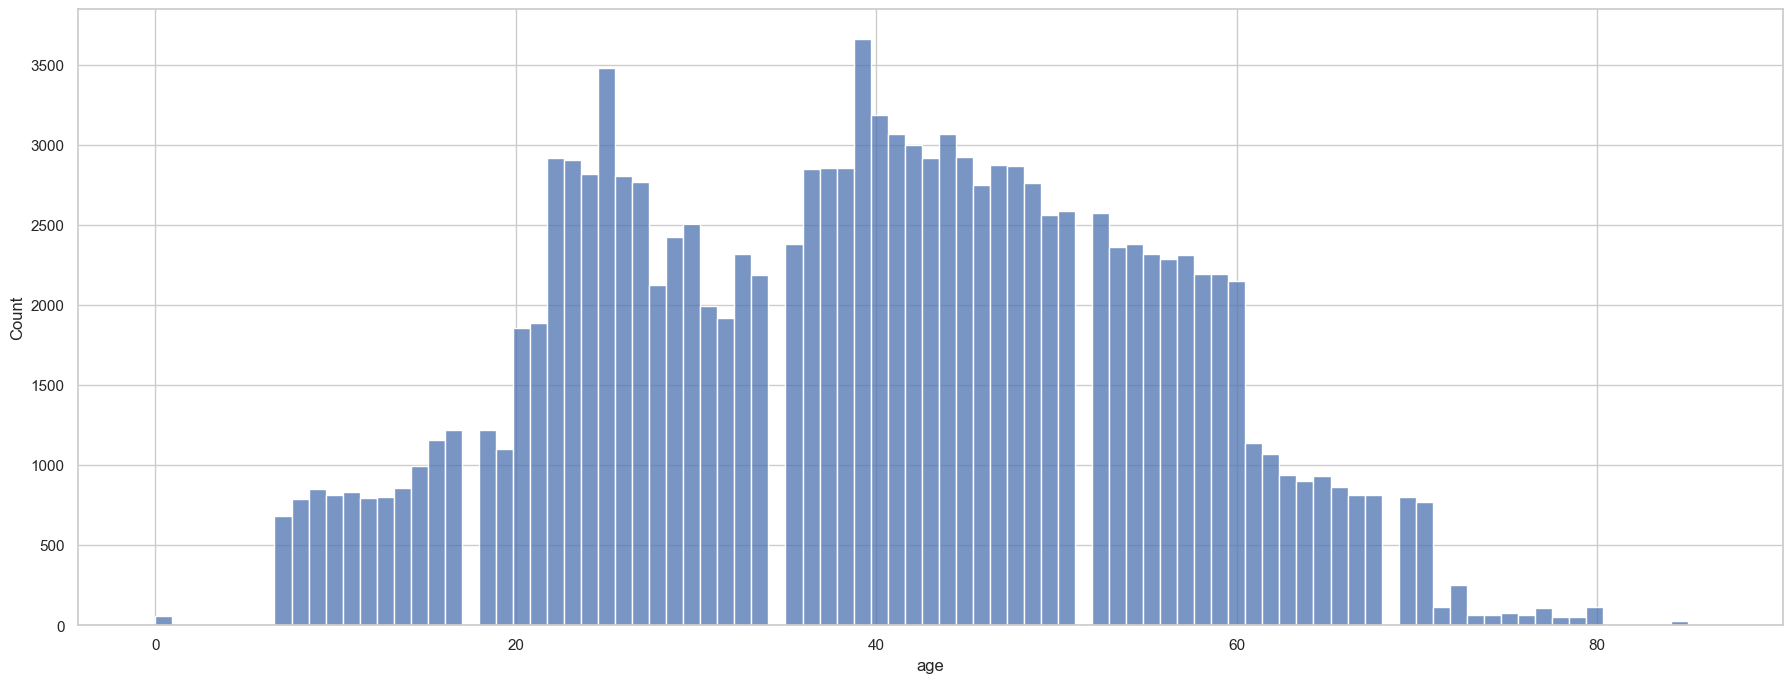

In [11]:
sns.histplot(df.query('age < 87').age);

Удалим из выборки людей старше 87 лет, можно меня наругать, но я считаю, что люди старше 100 лет скорее всего уже не летают, либо это очень редкие исключения. Это подтвердилось графиком распределения. Буду считать это ошибками и исключу из выборки.

#### Выбросы в flight_distance:

In [12]:
Q1_IQR, Q3_IQR = get_Q1_Q3_IDR(df, 'flight_distance')

Q1 = 414.0
Q3 = 1744.0
IQR = 1330.0
Q1 - 1.5 IQR = -1581.0
Q3 + 1.5 IQR = 3739.0


In [13]:
df.query('flight_distance > 4000').flight_distance.count()

315

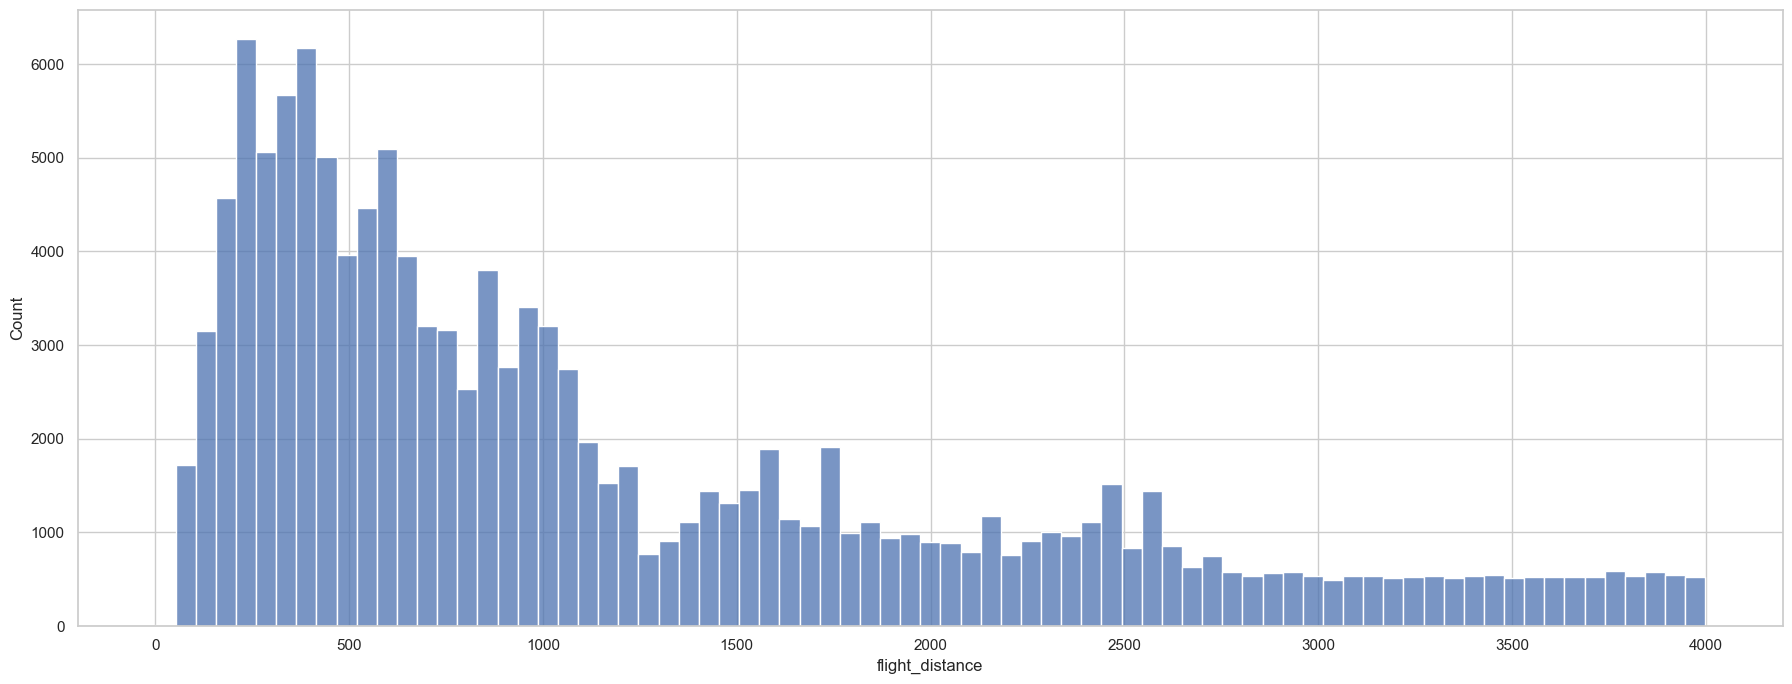

In [14]:
sns.histplot(df.query('flight_distance < 4000').flight_distance);

На данный момент пассажирский самолет с максимальной дальностью полета это Boeing 777 - 200, с дальностью полета 8555 морских миль. Абсолютным рекордом считается дальность в 13422 мили. Практически все полеты нашей авиакомпапнии ограничены 4000 миль, так и порежем.

#### Выбросы в departure_delay_in_minutes:

In [15]:
df.query('departure_delay_in_minutes > 300').departure_delay_in_minutes.count()

365

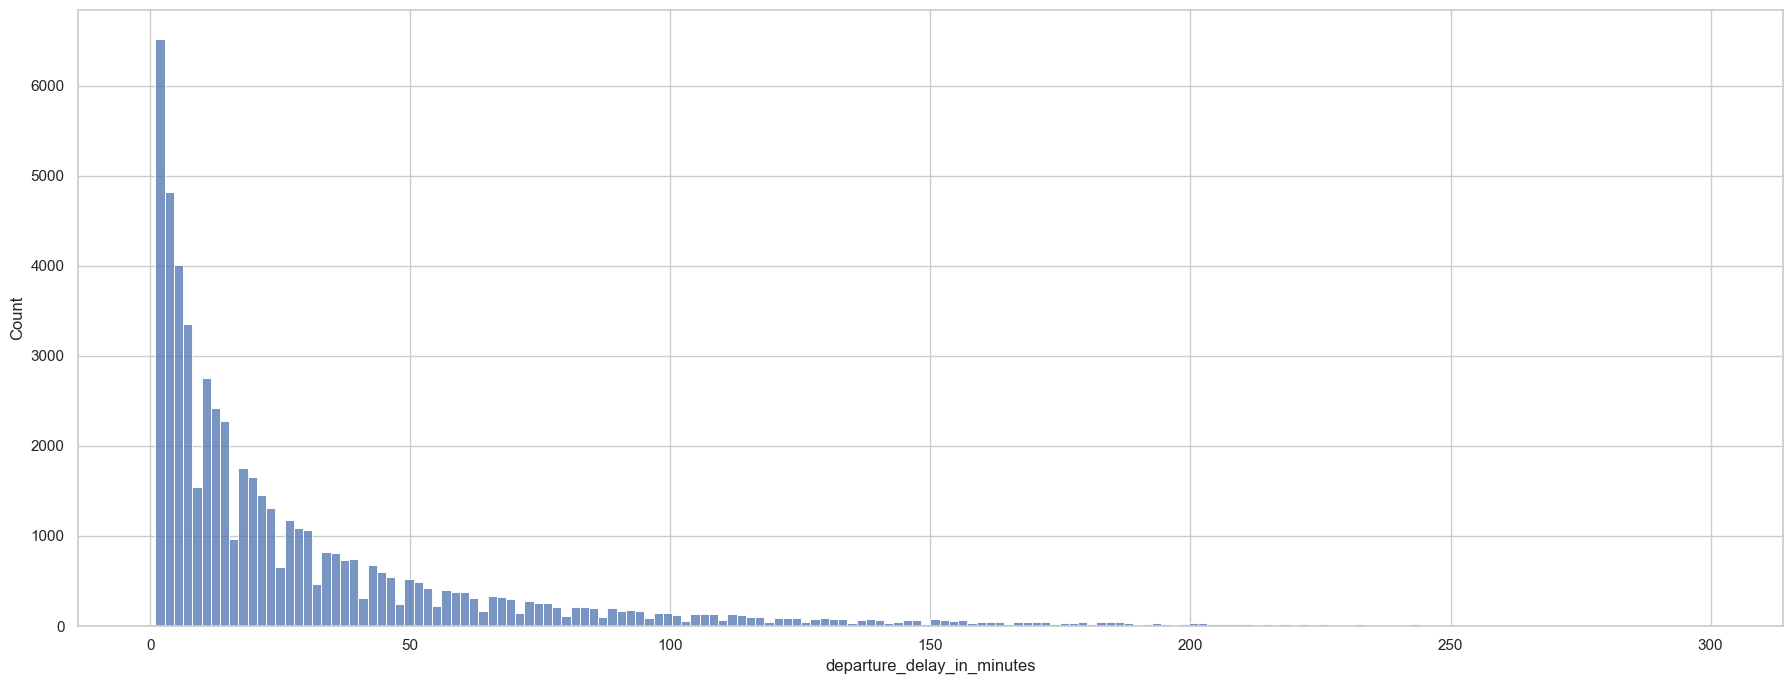

In [16]:
sns.histplot(df.query('0 < departure_delay_in_minutes < 300').departure_delay_in_minutes);

В нашей компании задержка рейса более 300 минут это что-то необычное, при том, что сама долгая задержка рейса в мире это 1 неделя или около 10000 минут, так и порежем.

#### Выбросы в arrival_delay_in_minutes

In [17]:
df.query('arrival_delay_in_minutes > 300').arrival_delay_in_minutes.count()

376

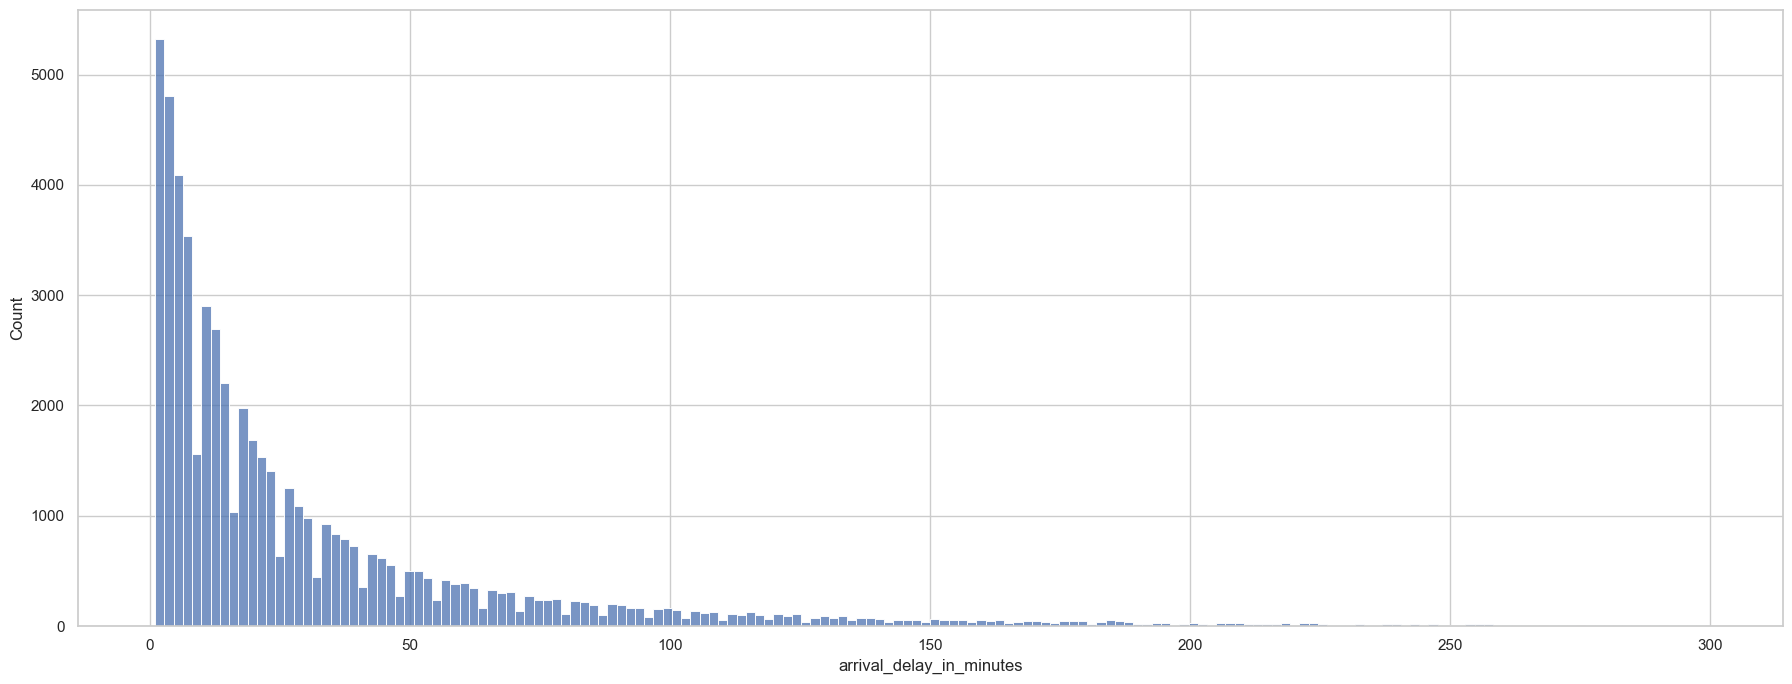

In [18]:
sns.histplot(df.query('0 < arrival_delay_in_minutes < 300').arrival_delay_in_minutes);

Собственно, зачастую, насколько рейс зареджали при вылете, на столько позже он и прилетит

#### Выбросы в inflight_wifi_service

In [19]:
df['inflight_wifi_service'].value_counts()

2.0     32306
3.0     32156
4.0     24758
1.0     22318
5.0     14345
0.0      3918
6.0         7
21.0        4
16.0        3
7.0         3
12.0        3
20.0        2
24.0        2
40.0        2
10.0        1
45.0        1
25.0        1
18.0        1
28.0        1
8.0         1
30.0        1
15.0        1
Name: inflight_wifi_service, dtype: int64

In [20]:
df['food_and_drink'].value_counts()

4.0     30546
5.0     27947
3.0     27769
2.0     27363
1.0     16035
0.0       138
8.0         4
16.0        3
12.0        3
9.0         3
15.0        2
6.0         2
24.0        2
27.0        2
7.0         2
36.0        1
21.0        1
45.0        1
35.0        1
30.0        1
25.0        1
18.0        1
32.0        1
10.0        1
Name: food_and_drink, dtype: int64

Это оценка от 1 до 5, соответственно, все что меньше 1 приравняем к 1, все что больше 5 удалим. Такая петрушка во всех оценках, так что принцип будет один.

In [20]:
df.describe(include='object')

,gender,customer_type,type_of_travel,class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


In [21]:
df.gender.value_counts()

Female    65726
Male      63823
Name: gender, dtype: int64

In [22]:
df.customer_type.value_counts()

Loyal Customer       106040
disloyal Customer     23763
Name: customer_type, dtype: int64

In [23]:
df.type_of_travel.value_counts()

Business travel    89625
Personal Travel    40154
Name: type_of_travel, dtype: int64

Все предыдущие признаки кодируем бинарно, а вот класс закодируем рангово, где эконом = 0, эконом плюс = 1, бизнес = 2

In [24]:
df['class'].value_counts()

Business    62103
Eco         58264
Eco Plus     9397
Name: class, dtype: int64

#### Анализ целевой переменной satisfaction

In [25]:
df.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
-                          25976
Name: satisfaction, dtype: int64

В бинарной целевой переменной довольно много пропусков, надо решить, отнести отсутствие оценки к neutral or dissatisfied, выбросить их из выборки или попробовать предсказать.

В первом приближении скажем, что прочерк это neutral or dissatisfied

### Собираем очищеный от выбросов датафрейм

In [26]:
df_f = df.query('age < 87 and \
                flight_distance < 4000 and \
                arrival_delay_in_minutes < 300 and \
                departure_delay_in_minutes < 300 and \
                inflight_wifi_service <= 5 and \
                departure_arrival_time_convenient <= 5 and \
                ease_of_online_booking <= 5 and \
                gate_location <= 5 and \
                food_and_drink <= 5 and \
                online_boarding <= 5 and \
                seat_comfort <= 5 and \
                inflight_entertainment <= 5 and \
                on_board_service <= 5 and \
                leg_room_service <= 5 and \
                baggage_handling <= 5 and \
                checkin_service <= 5 and \
                inflight_service <= 5 and \
                cleanliness <= 5')

In [27]:
df_f.isna().sum()

id                                     0
gender                               318
age                                    0
customer_type                         72
type_of_travel                        98
class                                115
flight_distance                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes               0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on_board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
satisfaction                           0
dtype: int64

В новом датасете пропусков не так и много, удалим их

In [28]:
df_f = df_f.dropna()
df_f

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,129875,Female,55.0,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,0.0,3.0,...,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,neutral or dissatisfied
129875,129876,Male,28.0,Loyal Customer,Personal Travel,Eco Plus,447.0,2.0,3.0,4.0,...,4.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,-
129877,129878,Male,42.0,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,14.0,2.0,...,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,neutral or dissatisfied
129878,129879,Male,50.0,Loyal Customer,Personal Travel,Eco Plus,337.0,31.0,22.0,5.0,...,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,satisfied


In [29]:
df_f.describe()

,id,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
count,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000,125907.000000
mean,64976.518033,39.423845,1186.894152,13.645032,14.042944,2.728292,3.057741,2.757234,2.977793,3.204008,3.251495,3.440746,3.358074,3.383331,3.350060,3.631808,3.305742,3.644039,3.285060
std,37499.358159,15.156803,993.186493,31.550685,31.987270,1.329934,1.527415,1.402103,1.278421,1.329727,1.351111,1.319404,1.334494,1.287081,1.316504,1.180067,1.266718,1.176174,1.313623
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32489.500000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,64993.000000,40.000000,842.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97468.500000,51.000000,1739.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,129880.000000,86.000000,3999.000000,299.000000,298.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [30]:
df_f.head()

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


In [31]:
code_nums = {"gender": {"Male": 1, "Female": 0},
             "customer_type": {"Loyal Customer": 1, "disloyal Customer": 0},
             "type_of_travel": {"Personal Travel": 0, "Business travel": 1},
             "class": {"Business": 2, "Eco Plus": 1, "Eco": 0}, 
             "satisfaction": {"neutral or dissatisfied": 0, "satisfied": 1, "-": np.nan}}

In [32]:
df_f = df_f.replace(code_nums)
df_f

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,1,1,48.0,0,1,2,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0.0
1,2,0,35.0,1,1,2,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,1.0
2,3,1,41.0,1,1,2,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,1.0
3,4,1,50.0,1,1,2,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,1.0
4,5,0,49.0,1,1,2,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,129875,0,55.0,1,0,1,308.0,0.0,0.0,3.0,...,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,0.0
129875,129876,1,28.0,1,0,1,447.0,2.0,3.0,4.0,...,4.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,NaN
129877,129878,1,42.0,1,0,1,337.0,6.0,14.0,2.0,...,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,0.0
129878,129879,1,50.0,1,0,1,337.0,31.0,22.0,5.0,...,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,1.0


<AxesSubplot:>

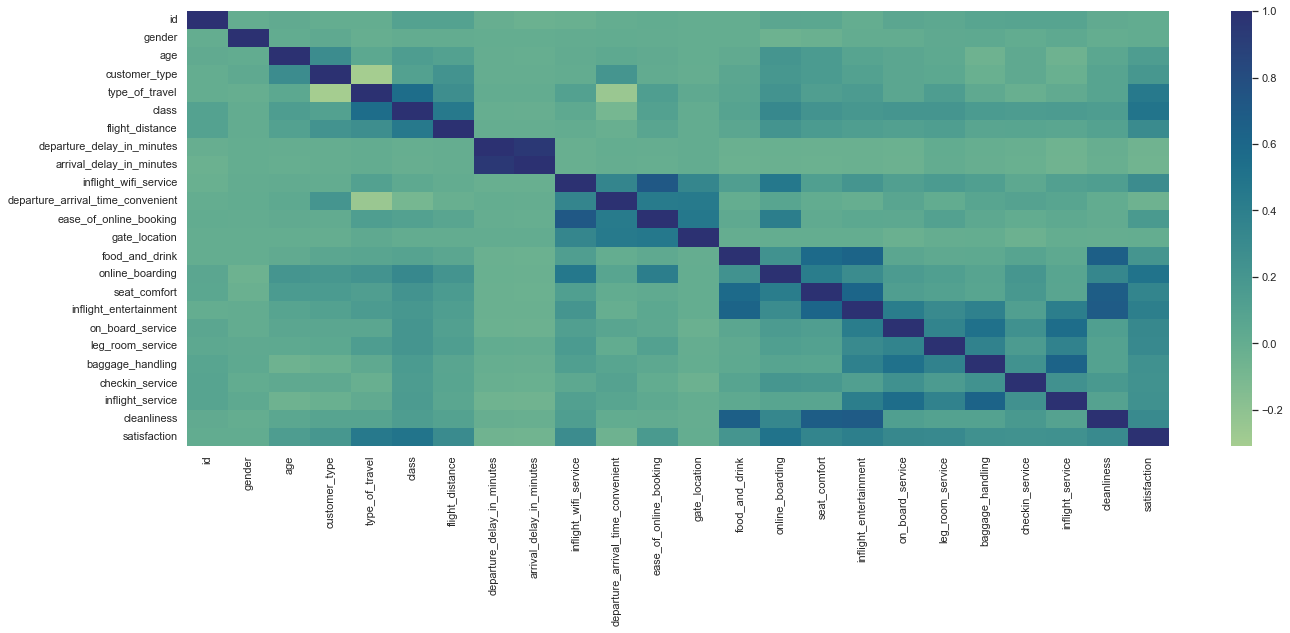

In [33]:
corr = df_f.corr()

sns.heatmap(corr, cmap="crest")

Сильнокоррелируемых признаков с целевой переменной нет, между признаками только задержка отбытия и прибытия, так что вырезать пока ничего не будем.

Так как в нашем наборе целевая переменная имеет много пропусков, попробуем предсказать эти пропуски при помощи KNNImputer

In [34]:
from sklearn.impute import KNNImputer
# заводим KNNImputer. Его же вы будете использовать для заполнения пропусков в тестовых данных
imputer = KNNImputer(n_neighbors=10)
# Обучаем KNNImputer на X_train
imputer.fit(df_f)
# Получаем новый new_X_train — данные как X_train, только без пропусков
new_df = imputer.transform(df_f)

In [35]:
new_df

array([[1.00000e+00, 1.00000e+00, 4.80000e+01, ..., 5.00000e+00,
        5.00000e+00, 0.00000e+00],
       [2.00000e+00, 0.00000e+00, 3.50000e+01, ..., 5.00000e+00,
        5.00000e+00, 1.00000e+00],
       [3.00000e+00, 1.00000e+00, 4.10000e+01, ..., 3.00000e+00,
        5.00000e+00, 1.00000e+00],
       ...,
       [1.29878e+05, 1.00000e+00, 4.20000e+01, ..., 4.00000e+00,
        3.00000e+00, 0.00000e+00],
       [1.29879e+05, 1.00000e+00, 5.00000e+01, ..., 4.00000e+00,
        3.00000e+00, 1.00000e+00],
       [1.29880e+05, 0.00000e+00, 2.00000e+01, ..., 2.00000e+00,
        2.00000e+00, 0.00000e+00]])

In [36]:
new_df.shape

(125907, 24)

In [37]:
new_df[:,23]

array([0., 1., 1., ..., 0., 1., 0.])

In [38]:
df_f.satisfaction = new_df[:,23]
df_f

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,1,1,48.0,0,1,2,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0.0
1,2,0,35.0,1,1,2,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,1.0
2,3,1,41.0,1,1,2,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,1.0
3,4,1,50.0,1,1,2,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,1.0
4,5,0,49.0,1,1,2,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,129875,0,55.0,1,0,1,308.0,0.0,0.0,3.0,...,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,0.0
129875,129876,1,28.0,1,0,1,447.0,2.0,3.0,4.0,...,4.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,0.3
129877,129878,1,42.0,1,0,1,337.0,6.0,14.0,2.0,...,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,0.0
129878,129879,1,50.0,1,0,1,337.0,31.0,22.0,5.0,...,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,1.0


In [39]:
df_f.satisfaction.value_counts()

0.0    58248
1.0    44139
0.3     3591
0.4     3362
0.2     3274
0.5     2934
0.1     2499
0.6     2466
0.7     2179
0.8     1886
0.9     1329
Name: satisfaction, dtype: int64

Теперь в нашем датафрейме есть предсказанная удовлетворенность, выставим значения от 0.1 до 0.5 в 0, а 0.6 и выше в 1

In [40]:
df_f = df_f.replace({"satisfaction": {0.1: 0, 0.2: 0, 0.3: 0, 0.4: 0, 0.5: 0, 0.6: 1, 0.7: 1, 0.8: 1, 0.9: 1,}})

In [41]:
df_f.satisfaction.value_counts()

0.0    73908
1.0    51999
Name: satisfaction, dtype: int64

## Переходим к машинному обучению

In [42]:
X = df_f.drop(columns = ['satisfaction'])
y = df_f.satisfaction

Разобъем выборку на обучающую и тестовую в отношении 80 / 20

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((100725, 23), (25182, 23))

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[10973,  3958],
       [ 3081,  7170]], dtype=int64)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=42, shuffle=False)

model_3 = DecisionTreeClassifier(random_state=42)
model_3.fit(X_train, y_train)
pred_3 = model_3.predict(X_test)

In [48]:
confusion_matrix(y_test, pred_3)

array([[12951,  1980],
       [ 1945,  8306]], dtype=int64)

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=42, shuffle=False)

model_1 = AdaBoostClassifier(n_estimators=1000, random_state=42)
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)

In [50]:
confusion_matrix(y_test, pred_1)

array([[13330,  1601],
       [ 1529,  8722]], dtype=int64)

In [51]:
from sklearn.metrics import roc_curve, precision_recall_curve

pred_proba_train = model_1.predict_proba(X_train)
pred_proba_test = model_1.predict_proba(X_test)
    
fpr_train, tpr_train, _ = roc_curve(y_train, pred_proba_train[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, pred_proba_test[:, 1])

precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, pred_proba_test[:, 1])      
f1 = 2 * precision_test * recall_test  / (precision_test + recall_test)

# Берем beta меньше нуля, тем самым ставя точность приоритетнее полноты
beta = 0.5
f_beta = (1 + beta**2) * precision_test * recall_test  / (beta**2 * precision_test + recall_test)

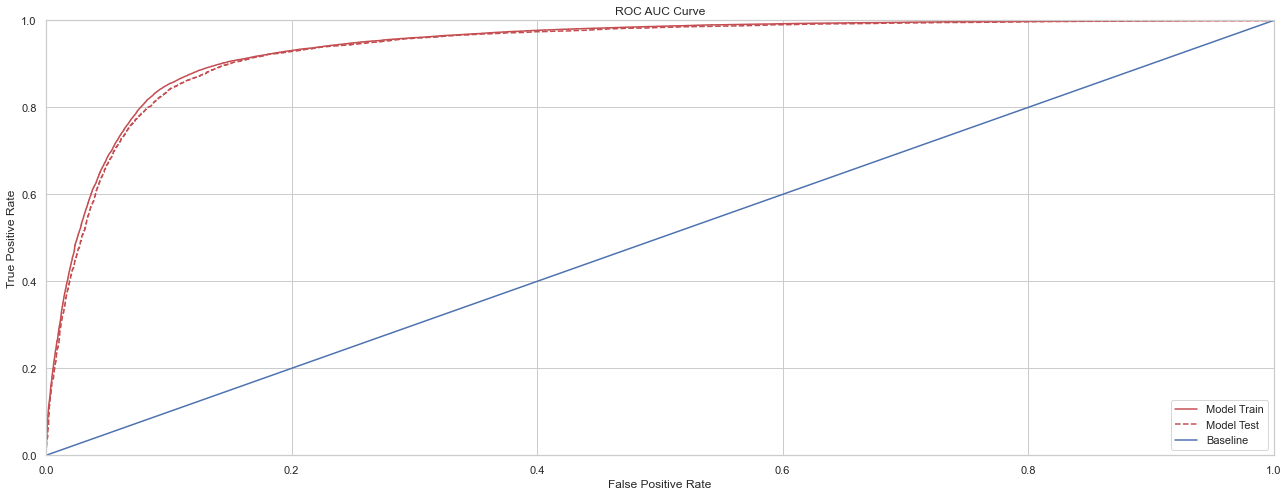

In [63]:
fig, axes = plt.subplots(1, 1, figsize = (22, 8))

axes.plot(fpr_train, tpr_train, 'r', label = 'Model Train')
axes.plot(fpr_test, tpr_test, 'r--', label = 'Model Test')
axes.plot([0, 1], [0, 1], 'b', label = 'Baseline')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
axes.legend(loc = "lower right")
axes.set_title('ROC AUC Curve')

plt.show()

In [53]:
ind_max_f1 = np.where(f1 == max(f1))[0][0]
ind_max_f_beta = np.where(f_beta == max(f_beta))[0][0]

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1[ind_max_f1], 3),
                 round(f_beta[ind_max_f1], 3),
                 round(recall_test[ind_max_f1], 3),
                 round(precision_test[ind_max_f1], 3)]))

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1[ind_max_f_beta], 3),
                 round(f_beta[ind_max_f_beta], 3),
                 round(recall_test[ind_max_f_beta], 3),
                 round(precision_test[ind_max_f_beta], 3)]))

F1 Score = 0.851:  F_beta Score = 0.828  Recall = 0.893  Precision = 0.813
F1 Score = 0.822:  F_beta Score = 0.855  Recall = 0.772  Precision = 0.879


In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=42, shuffle=False)

model_2 = BaggingClassifier(n_estimators=1000, random_state=42)
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)

In [65]:
confusion_matrix(y_test, pred_2)

array([[13633,  1298],
       [ 1067,  9184]], dtype=int64)

In [66]:
pred_proba_train_2 = model_2.predict_proba(X_train)
pred_proba_test_2 = model_2.predict_proba(X_test)
    
fpr_train_2, tpr_train_2, _ = roc_curve(y_train, pred_proba_train_2[:, 1])
fpr_test_2, tpr_test_2, _ = roc_curve(y_test, pred_proba_test_2[:, 1])

precision_test_2, recall_test_2, thresholds_test_2 = precision_recall_curve(y_test, pred_proba_test_2[:, 1])      
f1_2 = 2 * precision_test_2 * recall_test_2  / (precision_test_2 + recall_test_2)

# Берем beta меньше нуля, тем самым ставя точность приоритетнее полноты
beta = 0.5
f_beta_2 = (1 + beta**2) * precision_test_2 * recall_test_2  / (beta**2 * precision_test_2 + recall_test_2)

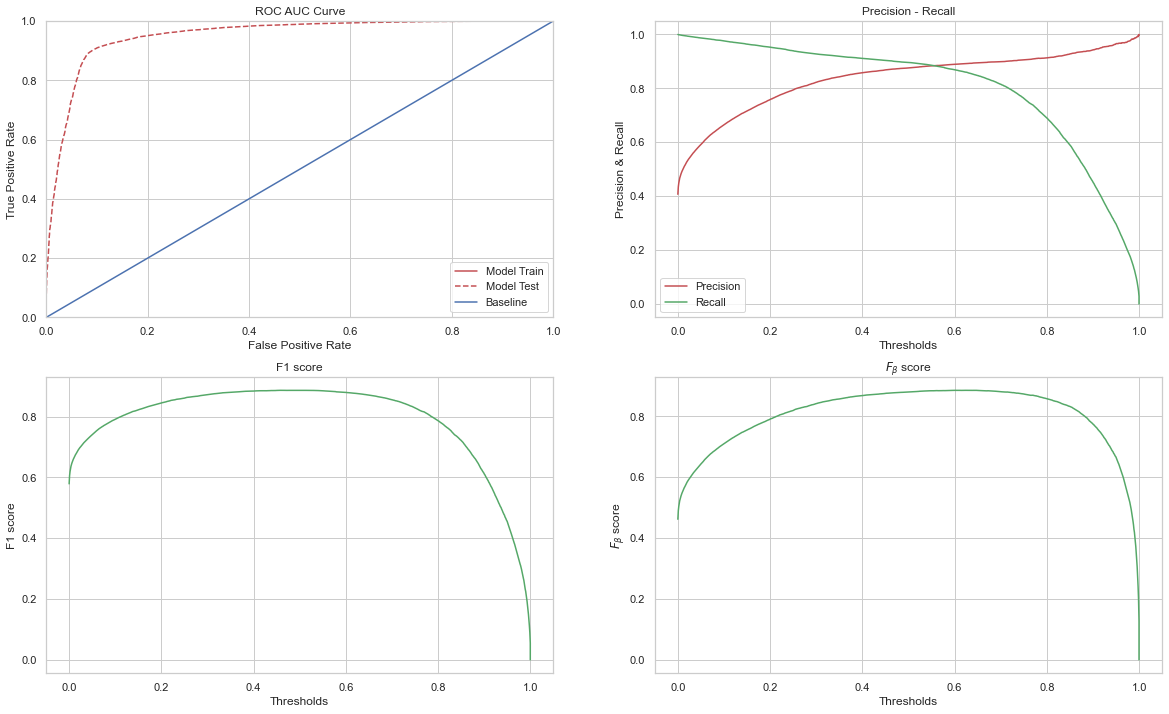

In [68]:
fig, axes = plt.subplots(2, 2, figsize = (20, 12))

axes[0][0].plot(fpr_train_2, tpr_train_2, 'r', label = 'Model Train')
axes[0][0].plot(fpr_test_2, tpr_test_2, 'r--', label = 'Model Test')
axes[0][0].plot([0, 1], [0, 1], 'b', label = 'Baseline')
axes[0][0].set_xlim([0.0, 1.0])
axes[0][0].set_ylim([0.0, 1.0])
axes[0][0].set_xlabel('False Positive Rate')
axes[0][0].set_ylabel('True Positive Rate')
axes[0][0].legend(loc = "lower right")
axes[0][0].set_title('ROC AUC Curve')


axes[0][1].plot(np.append(thresholds_test_2, 1.0), precision_test_2, 'r', label = 'Precision')
axes[0][1].plot(np.append(thresholds_test_2, 1.0), recall_test_2, 'g', label = 'Recall')
axes[0][1].set_xlabel('Thresholds')
axes[0][1].set_ylabel('Precision & Recall')
axes[0][1].legend(loc = "lower left")
axes[0][1].set_title('Precision - Recall')


axes[1][0].plot(np.append(thresholds_test_2, 1.0), f1_2, 'g')
axes[1][0].set_xlabel('Thresholds')
axes[1][0].set_ylabel('F1 score')
axes[1][0].set_title('F1 score')

axes[1][1].plot(np.append(thresholds_test_2, 1.0), f_beta_2, 'g')
axes[1][1].set_xlabel('Thresholds')
axes[1][1].set_ylabel(r'$F_{\beta}$' + ' score')
axes[1][1].set_title(r'$F_{\beta}$' + ' score')
       
plt.show()

In [69]:
ind_max_f1_2 = np.where(f1_2 == max(f1_2))[0][0]
ind_max_f_beta_2 = np.where(f_beta_2 == max(f_beta_2))[0][0]

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1_2[ind_max_f1_2], 3),
                 round(f_beta_2[ind_max_f1_2], 3),
                 round(recall_test_2[ind_max_f1_2], 3),
                 round(precision_test_2[ind_max_f1_2], 3)]))

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1_2[ind_max_f_beta_2], 3),
                 round(f_beta_2[ind_max_f_beta_2], 3),
                 round(recall_test_2[ind_max_f_beta_2], 3),
                 round(precision_test_2[ind_max_f_beta_2], 3)]))

F1 Score = 0.886:  F_beta Score = 0.877  Recall = 0.902  Precision = 0.871
F1 Score = 0.876:  F_beta Score = 0.886  Recall = 0.86  Precision = 0.892


При таких параметрах Бэггинг дал лучший результат

## Предскажем на датасете в котором выбросим прочерки

In [70]:
df.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
-                          25976
Name: satisfaction, dtype: int64

In [71]:
df_ff = df.query('age < 87 and \
                flight_distance < 4000 and \
                arrival_delay_in_minutes < 300 and \
                departure_delay_in_minutes < 300 and \
                inflight_wifi_service <= 5 and \
                departure_arrival_time_convenient <= 5 and \
                ease_of_online_booking <= 5 and \
                gate_location <= 5 and \
                food_and_drink <= 5 and \
                online_boarding <= 5 and \
                seat_comfort <= 5 and \
                inflight_entertainment <= 5 and \
                on_board_service <= 5 and \
                leg_room_service <= 5 and \
                baggage_handling <= 5 and \
                checkin_service <= 5 and \
                inflight_service <= 5 and \
                cleanliness <= 5')

In [72]:
df_ff = df_ff.replace(code_nums)
df_ff

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,1,1.0,48.0,0.0,1.0,2.0,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0.0
1,2,0.0,35.0,1.0,1.0,2.0,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,1.0
2,3,1.0,41.0,1.0,1.0,2.0,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,1.0
3,4,1.0,50.0,1.0,1.0,2.0,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,1.0
4,5,0.0,49.0,1.0,1.0,2.0,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,129875,0.0,55.0,1.0,0.0,1.0,308.0,0.0,0.0,3.0,...,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,0.0
129875,129876,1.0,28.0,1.0,0.0,1.0,447.0,2.0,3.0,4.0,...,4.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,NaN
129877,129878,1.0,42.0,1.0,0.0,1.0,337.0,6.0,14.0,2.0,...,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,0.0
129878,129879,1.0,50.0,1.0,0.0,1.0,337.0,31.0,22.0,5.0,...,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,1.0


In [73]:
df_ff.isna().sum()

id                                       0
gender                                 318
age                                      0
customer_type                           72
type_of_travel                          98
class                                  115
flight_distance                          0
departure_delay_in_minutes               0
arrival_delay_in_minutes                 0
inflight_wifi_service                    0
departure_arrival_time_convenient        0
ease_of_online_booking                   0
gate_location                            0
food_and_drink                           0
online_boarding                          0
seat_comfort                             0
inflight_entertainment                   0
on_board_service                         0
leg_room_service                         0
baggage_handling                         0
checkin_service                          0
inflight_service                         0
cleanliness                              0
satisfactio

In [74]:
df_ff = df_ff.dropna()

In [75]:
df_ff

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,1,1.0,48.0,0.0,1.0,2.0,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0.0
1,2,0.0,35.0,1.0,1.0,2.0,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,1.0
2,3,1.0,41.0,1.0,1.0,2.0,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,1.0
3,4,1.0,50.0,1.0,1.0,2.0,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,1.0
4,5,0.0,49.0,1.0,1.0,2.0,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,129874,0.0,28.0,1.0,0.0,1.0,337.0,0.0,0.0,4.0,...,4.0,3.0,3.0,1.0,5.0,3.0,4.0,4.0,3.0,0.0
129874,129875,0.0,55.0,1.0,0.0,1.0,308.0,0.0,0.0,3.0,...,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,0.0
129877,129878,1.0,42.0,1.0,0.0,1.0,337.0,6.0,14.0,2.0,...,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,0.0
129878,129879,1.0,50.0,1.0,0.0,1.0,337.0,31.0,22.0,5.0,...,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,1.0


Получили датасет без необределенных параметров таргета, попробуем пообучаться на нем

In [76]:
X_1 = df_ff.drop(columns = ['satisfaction'])
y_1 = df_ff.satisfaction

In [78]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

X_1_train.shape, X_1_test.shape

((80594, 23), (20149, 23))

## Ada Boost

In [79]:
X_1, y_1 = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=42, shuffle=False)
model_10 = AdaBoostClassifier(n_estimators=1000, random_state=42)
model_10.fit(X_1_train, y_1_train)
pred_10 = model_10.predict(X_1_test)
confusion_matrix(y_1_test, pred_10)

array([[10816,   678],
       [  748,  7907]], dtype=int64)

In [80]:
pred_proba_train_10 = model_10.predict_proba(X_1_train)
pred_proba_test_10 = model_10.predict_proba(X_1_test)
    
fpr_train_10, tpr_train_10, _ = roc_curve(y_1_train, pred_proba_train_10[:, 1])
fpr_test_10, tpr_test_10, _ = roc_curve(y_1_test, pred_proba_test_10[:, 1])

precision_test_10, recall_test_10, thresholds_test_10 = precision_recall_curve(y_1_test, pred_proba_test_10[:, 1])      
f1_10 = 2 * precision_test_10 * recall_test_10  / (precision_test_10 + recall_test_10)

# Берем beta меньше нуля, тем самым ставя точность приоритетнее полноты
beta = 0.5
f_beta_10 = (1 + beta**2) * precision_test_10 * recall_test_10  / (beta**2 * precision_test_10 + recall_test_10)

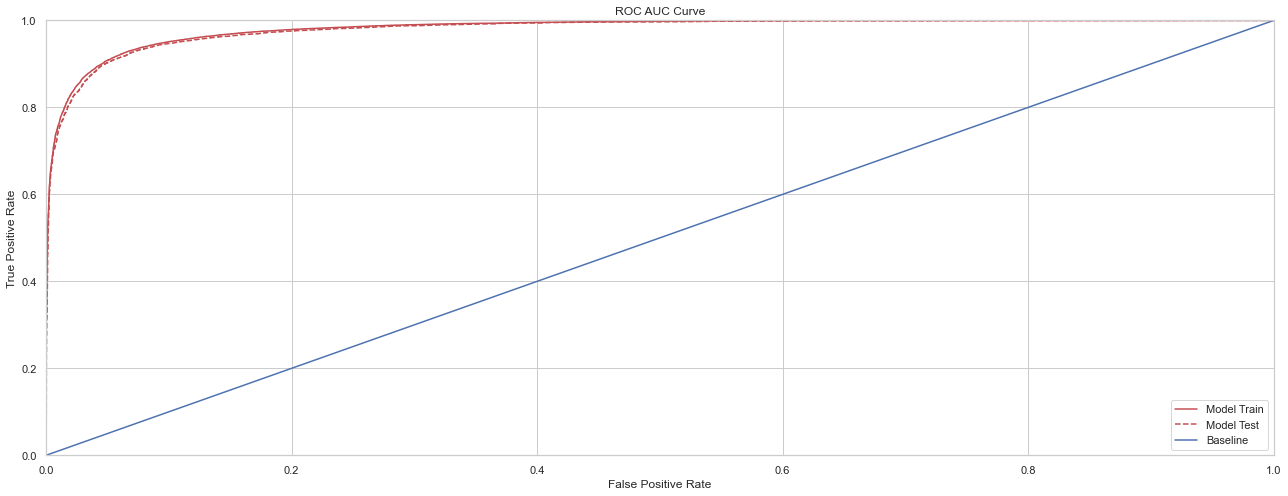

In [81]:
fig, axes = plt.subplots(1, 1, figsize = (22, 8))

axes.plot(fpr_train_10, tpr_train_10, 'r', label = 'Model Train')
axes.plot(fpr_test_10, tpr_test_10, 'r--', label = 'Model Test')
axes.plot([0, 1], [0, 1], 'b', label = 'Baseline')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
axes.legend(loc = "lower right")
axes.set_title('ROC AUC Curve')

plt.show()

In [82]:
ind_max_f1_10 = np.where(f1_10 == max(f1_10))[0][0]
ind_max_f_beta_10 = np.where(f_beta_10 == max(f_beta_10))[0][0]

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1_10[ind_max_f1_10], 3),
                 round(f_beta_10[ind_max_f1_10], 3),
                 round(recall_test_10[ind_max_f1_10], 3),
                 round(precision_test_10[ind_max_f1_10], 3)]))

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1_10[ind_max_f_beta_10], 3),
                 round(f_beta_10[ind_max_f_beta_10], 3),
                 round(recall_test_10[ind_max_f_beta_10], 3),
                 round(precision_test_10[ind_max_f_beta_10], 3)]))

F1 Score = 0.918:  F_beta Score = 0.914  Recall = 0.924  Precision = 0.912
F1 Score = 0.891:  F_beta Score = 0.934  Recall = 0.827  Precision = 0.965


## Bagging

In [83]:
X_1, y_1 = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=42, shuffle=False)
model_20 = BaggingClassifier(n_estimators=1000, random_state=42)
model_20.fit(X_1_train, y_1_train)
pred_20 = model_20.predict(X_1_test)
confusion_matrix(y_1_test, pred_20)

array([[11234,   260],
       [  488,  8167]], dtype=int64)

In [84]:
pred_proba_train_20 = model_20.predict_proba(X_1_train)
pred_proba_test_20 = model_20.predict_proba(X_1_test)
    
fpr_train_20, tpr_train_20, _ = roc_curve(y_1_train, pred_proba_train_20[:, 1])
fpr_test_20, tpr_test_20, _ = roc_curve(y_1_test, pred_proba_test_20[:, 1])

precision_test_20, recall_test_20, thresholds_test_20 = precision_recall_curve(y_1_test, pred_proba_test_20[:, 1])      
f1_20 = 2 * precision_test_20 * recall_test_20  / (precision_test_20 + recall_test_20)

# Берем beta меньше нуля, тем самым ставя точность приоритетнее полноты
beta = 0.5
f_beta_20 = (1 + beta**2) * precision_test_20 * recall_test_20  / (beta**2 * precision_test_20 + recall_test_20)

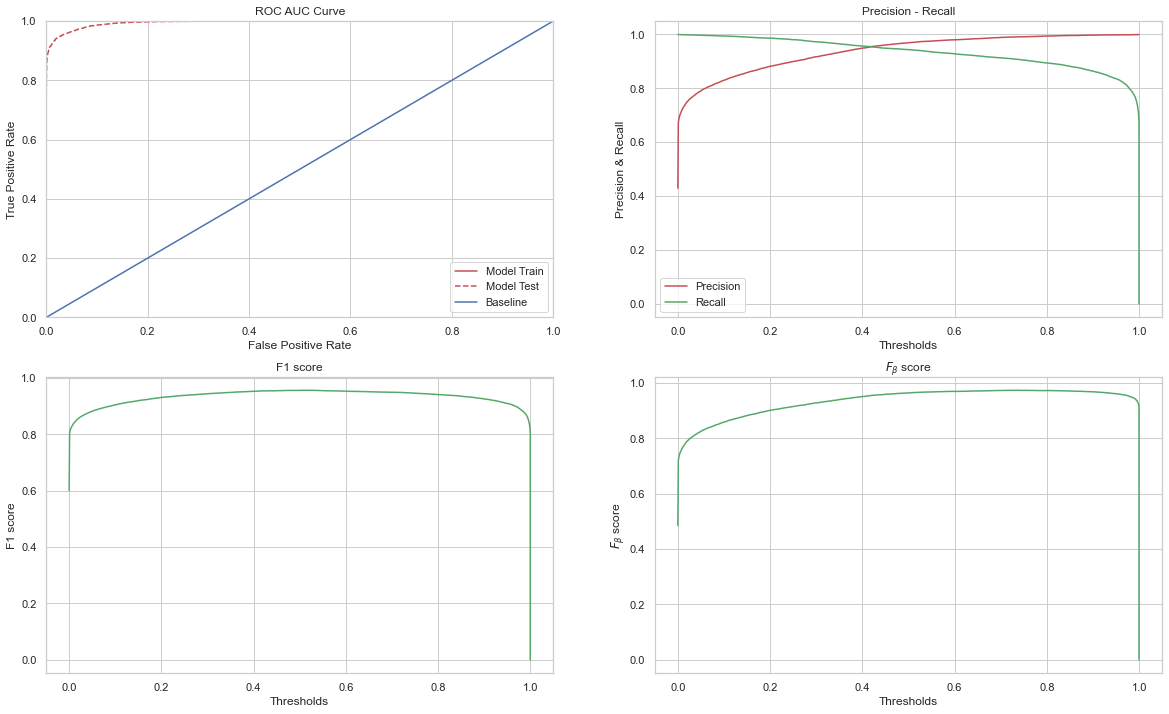

In [85]:
fig, axes = plt.subplots(2, 2, figsize = (20, 12))

axes[0][0].plot(fpr_train_20, tpr_train_20, 'r', label = 'Model Train')
axes[0][0].plot(fpr_test_20, tpr_test_20, 'r--', label = 'Model Test')
axes[0][0].plot([0, 1], [0, 1], 'b', label = 'Baseline')
axes[0][0].set_xlim([0.0, 1.0])
axes[0][0].set_ylim([0.0, 1.0])
axes[0][0].set_xlabel('False Positive Rate')
axes[0][0].set_ylabel('True Positive Rate')
axes[0][0].legend(loc = "lower right")
axes[0][0].set_title('ROC AUC Curve')


axes[0][1].plot(np.append(thresholds_test_20, 1.0), precision_test_20, 'r', label = 'Precision')
axes[0][1].plot(np.append(thresholds_test_20, 1.0), recall_test_20, 'g', label = 'Recall')
axes[0][1].set_xlabel('Thresholds')
axes[0][1].set_ylabel('Precision & Recall')
axes[0][1].legend(loc = "lower left")
axes[0][1].set_title('Precision - Recall')


axes[1][0].plot(np.append(thresholds_test_20, 1.0), f1_20, 'g')
axes[1][0].set_xlabel('Thresholds')
axes[1][0].set_ylabel('F1 score')
axes[1][0].set_title('F1 score')

axes[1][1].plot(np.append(thresholds_test_20, 1.0), f_beta_20, 'g')
axes[1][1].set_xlabel('Thresholds')
axes[1][1].set_ylabel(r'$F_{\beta}$' + ' score')
axes[1][1].set_title(r'$F_{\beta}$' + ' score')
       
plt.show()

In [86]:
ind_max_f1_20 = np.where(f1_20 == max(f1_20))[0][0]
ind_max_f_beta_20 = np.where(f_beta_20 == max(f_beta_20))[0][0]

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1_20[ind_max_f1_20], 3),
                 round(f_beta_20[ind_max_f1_20], 3),
                 round(recall_test_20[ind_max_f1_20], 3),
                 round(precision_test_20[ind_max_f1_20], 3)]))

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1_20[ind_max_f_beta_20], 3),
                 round(f_beta_20[ind_max_f_beta_20], 3),
                 round(recall_test_20[ind_max_f_beta_20], 3),
                 round(precision_test_20[ind_max_f_beta_20], 3)]))

F1 Score = 0.957:  F_beta Score = 0.966  Recall = 0.941  Precision = 0.973
F1 Score = 0.948:  F_beta Score = 0.973  Recall = 0.908  Precision = 0.991


Чтож, лучшая модель определена, подход тоже, сейчас попробуем закодировать класс через get_dummies и уже сделаем окончательный вывод

In [87]:
df

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28.0,Loyal Customer,Personal Travel,Eco Plus,447.0,2.0,3.0,4.0,...,4.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,-
129876,129877,Male,41.0,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,0.0,3.0,...,3.0,2.0,2.0,5.0,5.0,5.0,5.0,NaN,2.0,-
129877,129878,Male,42.0,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,14.0,2.0,...,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,neutral or dissatisfied
129878,129879,Male,50.0,Loyal Customer,Personal Travel,Eco Plus,337.0,31.0,22.0,5.0,...,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,satisfied


In [88]:
df_fff = df.query('age < 87 and \
                flight_distance < 4000 and \
                arrival_delay_in_minutes < 300 and \
                departure_delay_in_minutes < 300 and \
                inflight_wifi_service <= 5 and \
                departure_arrival_time_convenient <= 5 and \
                ease_of_online_booking <= 5 and \
                gate_location <= 5 and \
                food_and_drink <= 5 and \
                online_boarding <= 5 and \
                seat_comfort <= 5 and \
                inflight_entertainment <= 5 and \
                on_board_service <= 5 and \
                leg_room_service <= 5 and \
                baggage_handling <= 5 and \
                checkin_service <= 5 and \
                inflight_service <= 5 and \
                cleanliness <= 5')

In [89]:
df_fff

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,129875,Female,55.0,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,0.0,3.0,...,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,neutral or dissatisfied
129875,129876,Male,28.0,Loyal Customer,Personal Travel,Eco Plus,447.0,2.0,3.0,4.0,...,4.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,-
129877,129878,Male,42.0,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,14.0,2.0,...,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,neutral or dissatisfied
129878,129879,Male,50.0,Loyal Customer,Personal Travel,Eco Plus,337.0,31.0,22.0,5.0,...,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,satisfied


In [90]:
code_nums_new = {"gender": {"Male": 1, "Female": 0},
             "customer_type": {"Loyal Customer": 1, "disloyal Customer": 0},
             "type_of_travel": {"Personal Travel": 0, "Business travel": 1},
             "satisfaction": {"neutral or dissatisfied": 0, "satisfied": 1, "-": np.nan}}

In [91]:
df_fff = df_fff.replace(code_nums_new)
df_fff 

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,1,1.0,48.0,0.0,1.0,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0.0
1,2,0.0,35.0,1.0,1.0,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,1.0
2,3,1.0,41.0,1.0,1.0,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,1.0
3,4,1.0,50.0,1.0,1.0,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,1.0
4,5,0.0,49.0,1.0,1.0,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,129875,0.0,55.0,1.0,0.0,Eco Plus,308.0,0.0,0.0,3.0,...,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,0.0
129875,129876,1.0,28.0,1.0,0.0,Eco Plus,447.0,2.0,3.0,4.0,...,4.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,NaN
129877,129878,1.0,42.0,1.0,0.0,Eco Plus,337.0,6.0,14.0,2.0,...,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,0.0
129878,129879,1.0,50.0,1.0,0.0,Eco Plus,337.0,31.0,22.0,5.0,...,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,1.0


In [92]:
df_fff_1 = pd.get_dummies(df_fff, prefix = ['c'],
                          columns = ['class'],
                          drop_first = False)
df_fff_1

,id,gender,age,customer_type,type_of_travel,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,departure_arrival_time_convenient,...,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,c_Business,c_Eco,c_Eco Plus
0,1,1.0,48.0,0.0,1.0,821.0,2.0,5.0,3.0,3.0,...,3.0,2.0,5.0,4.0,5.0,5.0,0.0,1,0,0
1,2,0.0,35.0,1.0,1.0,821.0,26.0,39.0,2.0,2.0,...,5.0,5.0,5.0,3.0,5.0,5.0,1.0,1,0,0
2,3,1.0,41.0,1.0,1.0,853.0,0.0,0.0,4.0,4.0,...,3.0,3.0,3.0,4.0,3.0,5.0,1.0,1,0,0
3,4,1.0,50.0,1.0,1.0,1905.0,0.0,0.0,2.0,2.0,...,5.0,5.0,5.0,3.0,5.0,4.0,1.0,1,0,0
4,5,0.0,49.0,1.0,1.0,3470.0,0.0,1.0,3.0,3.0,...,3.0,4.0,3.0,3.0,3.0,5.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,129875,0.0,55.0,1.0,0.0,308.0,0.0,0.0,3.0,4.0,...,4.0,3.0,4.0,4.0,4.0,4.0,0.0,0,0,1
129875,129876,1.0,28.0,1.0,0.0,447.0,2.0,3.0,4.0,4.0,...,5.0,4.0,4.0,4.0,5.0,4.0,NaN,0,0,1
129877,129878,1.0,42.0,1.0,0.0,337.0,6.0,14.0,2.0,5.0,...,3.0,4.0,5.0,4.0,4.0,3.0,0.0,0,0,1
129878,129879,1.0,50.0,1.0,0.0,337.0,31.0,22.0,5.0,4.0,...,4.0,5.0,5.0,3.0,4.0,3.0,1.0,0,0,1


In [93]:
df_fff_1 = df_fff_1.dropna()
df_fff_1

,id,gender,age,customer_type,type_of_travel,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,departure_arrival_time_convenient,...,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,c_Business,c_Eco,c_Eco Plus
0,1,1.0,48.0,0.0,1.0,821.0,2.0,5.0,3.0,3.0,...,3.0,2.0,5.0,4.0,5.0,5.0,0.0,1,0,0
1,2,0.0,35.0,1.0,1.0,821.0,26.0,39.0,2.0,2.0,...,5.0,5.0,5.0,3.0,5.0,5.0,1.0,1,0,0
2,3,1.0,41.0,1.0,1.0,853.0,0.0,0.0,4.0,4.0,...,3.0,3.0,3.0,4.0,3.0,5.0,1.0,1,0,0
3,4,1.0,50.0,1.0,1.0,1905.0,0.0,0.0,2.0,2.0,...,5.0,5.0,5.0,3.0,5.0,4.0,1.0,1,0,0
4,5,0.0,49.0,1.0,1.0,3470.0,0.0,1.0,3.0,3.0,...,3.0,4.0,3.0,3.0,3.0,5.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,129874,0.0,28.0,1.0,0.0,337.0,0.0,0.0,4.0,2.0,...,1.0,5.0,3.0,4.0,4.0,3.0,0.0,0,0,1
129874,129875,0.0,55.0,1.0,0.0,308.0,0.0,0.0,3.0,4.0,...,4.0,3.0,4.0,4.0,4.0,4.0,0.0,0,0,1
129877,129878,1.0,42.0,1.0,0.0,337.0,6.0,14.0,2.0,5.0,...,3.0,4.0,5.0,4.0,4.0,3.0,0.0,0,0,1
129878,129879,1.0,50.0,1.0,0.0,337.0,31.0,22.0,5.0,4.0,...,4.0,5.0,5.0,3.0,4.0,3.0,1.0,0,0,1


In [94]:
X_2 = df_fff_1.drop(columns = ['satisfaction'])
y_2 = df_fff_1.satisfaction

In [95]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

X_2_train.shape, X_2_test.shape

((80664, 25), (20167, 25))

In [96]:
X_2, y_2 = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=42, shuffle=False)
model_100 = AdaBoostClassifier(n_estimators=1000, random_state=42)
model_100.fit(X_2_train, y_2_train)
pred_100 = model_100.predict(X_2_test)
confusion_matrix(y_2_test, pred_100)

array([[10793,   690],
       [  701,  7983]], dtype=int64)

In [97]:
pred_proba_train_100 = model_100.predict_proba(X_2_train)
pred_proba_test_100 = model_100.predict_proba(X_2_test)
    
fpr_train_100, tpr_train_100, _ = roc_curve(y_2_train, pred_proba_train_100[:, 1])
fpr_test_100, tpr_test_100, _ = roc_curve(y_2_test, pred_proba_test_100[:, 1])

precision_test_100, recall_test_100, thresholds_test_100 = precision_recall_curve(y_2_test, pred_proba_test_100[:, 1])      
f1_100 = 2 * precision_test_100 * recall_test_100  / (precision_test_100 + recall_test_100)

# Берем beta меньше нуля, тем самым ставя точность приоритетнее полноты
beta = 0.5
f_beta_100 = (1 + beta**2) * precision_test_100 * recall_test_100  / (beta**2 * precision_test_100 + recall_test_100)

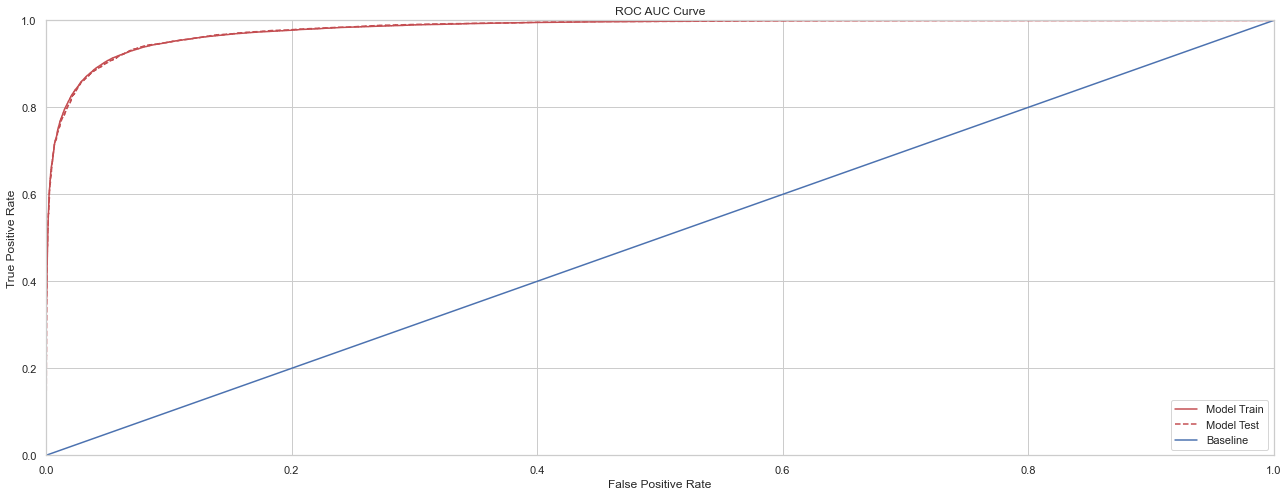

In [98]:
fig, axes = plt.subplots(1, 1, figsize = (22, 8))

axes.plot(fpr_train_100, tpr_train_100, 'r', label = 'Model Train')
axes.plot(fpr_test_100, tpr_test_100, 'r--', label = 'Model Test')
axes.plot([0, 1], [0, 1], 'b', label = 'Baseline')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
axes.legend(loc = "lower right")
axes.set_title('ROC AUC Curve')

plt.show()

In [99]:
ind_max_f1_100 = np.where(f1_100 == max(f1_100))[0][0]
ind_max_f_beta_100 = np.where(f_beta_100 == max(f_beta_100))[0][0]

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1_100[ind_max_f1_100], 3),
                 round(f_beta_100[ind_max_f1_100], 3),
                 round(recall_test_100[ind_max_f1_100], 3),
                 round(precision_test_100[ind_max_f1_100], 3)]))

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1_100[ind_max_f_beta_100], 3),
                 round(f_beta_100[ind_max_f_beta_100], 3),
                 round(recall_test_100[ind_max_f_beta_100], 3),
                 round(precision_test_100[ind_max_f_beta_100], 3)]))

F1 Score = 0.921:  F_beta Score = 0.913  Recall = 0.934  Precision = 0.908
F1 Score = 0.905:  F_beta Score = 0.936  Recall = 0.858  Precision = 0.958


In [100]:
X_2, y_2 = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=42, shuffle=False)
model_200 = BaggingClassifier(n_estimators=1000, random_state=42)
model_200.fit(X_2_train, y_2_train)
pred_200 = model_200.predict(X_2_test)
confusion_matrix(y_2_test, pred_200)

array([[11212,   271],
       [  491,  8193]], dtype=int64)

In [101]:
pred_proba_train_200 = model_200.predict_proba(X_2_train)
pred_proba_test_200 = model_200.predict_proba(X_2_test)
    
fpr_train_200, tpr_train_200, _ = roc_curve(y_2_train, pred_proba_train_200[:, 1])
fpr_test_200, tpr_test_200, _ = roc_curve(y_2_test, pred_proba_test_200[:, 1])

precision_test_200, recall_test_200, thresholds_test_200 = precision_recall_curve(y_2_test, pred_proba_test_200[:, 1])      
f1_200 = 2 * precision_test_200 * recall_test_200  / (precision_test_200 + recall_test_200)

# Берем beta меньше нуля, тем самым ставя точность приоритетнее полноты
beta = 0.5
f_beta_200 = (1 + beta**2) * precision_test_200 * recall_test_200  / (beta**2 * precision_test_200 + recall_test_200)

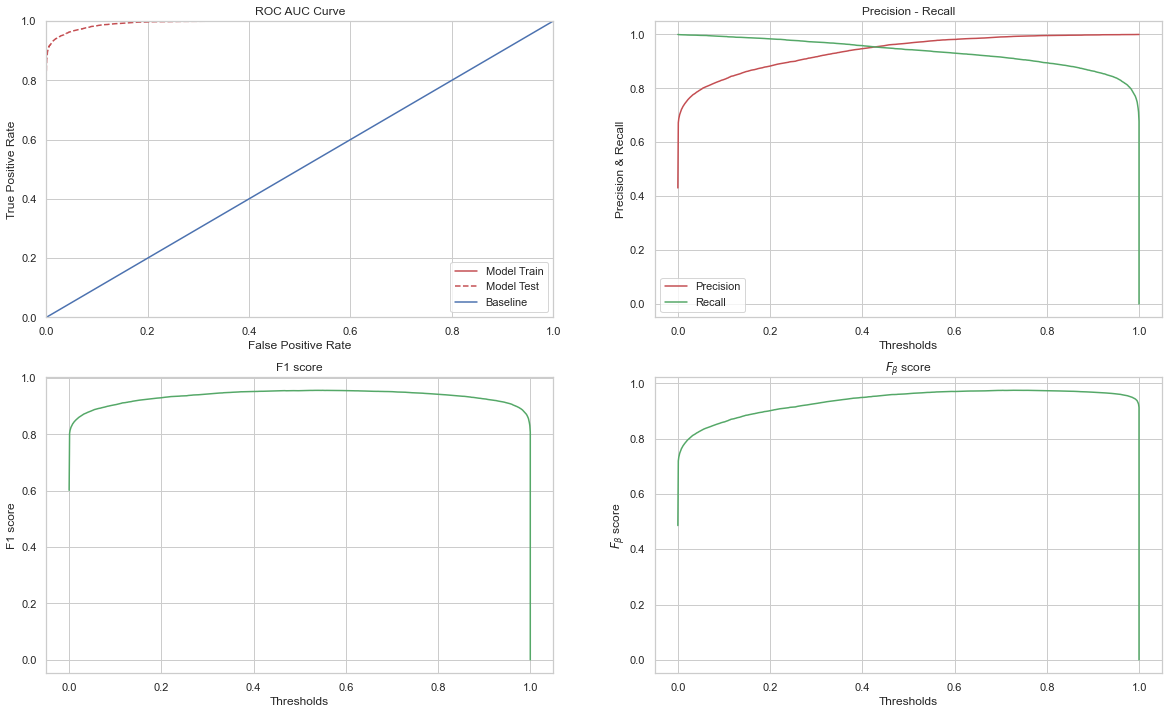

In [102]:
fig, axes = plt.subplots(2, 2, figsize = (20, 12))

axes[0][0].plot(fpr_train_200, tpr_train_200, 'r', label = 'Model Train')
axes[0][0].plot(fpr_test_200, tpr_test_200, 'r--', label = 'Model Test')
axes[0][0].plot([0, 1], [0, 1], 'b', label = 'Baseline')
axes[0][0].set_xlim([0.0, 1.0])
axes[0][0].set_ylim([0.0, 1.0])
axes[0][0].set_xlabel('False Positive Rate')
axes[0][0].set_ylabel('True Positive Rate')
axes[0][0].legend(loc = "lower right")
axes[0][0].set_title('ROC AUC Curve')


axes[0][1].plot(np.append(thresholds_test_200, 1.0), precision_test_200, 'r', label = 'Precision')
axes[0][1].plot(np.append(thresholds_test_200, 1.0), recall_test_200, 'g', label = 'Recall')
axes[0][1].set_xlabel('Thresholds')
axes[0][1].set_ylabel('Precision & Recall')
axes[0][1].legend(loc = "lower left")
axes[0][1].set_title('Precision - Recall')


axes[1][0].plot(np.append(thresholds_test_200, 1.0), f1_200, 'g')
axes[1][0].set_xlabel('Thresholds')
axes[1][0].set_ylabel('F1 score')
axes[1][0].set_title('F1 score')

axes[1][1].plot(np.append(thresholds_test_200, 1.0), f_beta_200, 'g')
axes[1][1].set_xlabel('Thresholds')
axes[1][1].set_ylabel(r'$F_{\beta}$' + ' score')
axes[1][1].set_title(r'$F_{\beta}$' + ' score')
       
plt.show()

In [103]:
ind_max_f1_200 = np.where(f1_200 == max(f1_200))[0][0]
ind_max_f_beta_200 = np.where(f_beta_200 == max(f_beta_200))[0][0]

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1_200[ind_max_f1_200], 3),
                 round(f_beta_200[ind_max_f1_200], 3),
                 round(recall_test_200[ind_max_f1_200], 3),
                 round(precision_test_200[ind_max_f1_200], 3)]))

print('F1 Score = {s[0]}:  F_beta Score = {s[1]}  Recall = {s[2]}  Precision = {s[3]}'.\
     format(s = [round(f1_200[ind_max_f_beta_200], 3),
                 round(f_beta_200[ind_max_f_beta_200], 3),
                 round(recall_test_200[ind_max_f_beta_200], 3),
                 round(precision_test_200[ind_max_f_beta_200], 3)]))

F1 Score = 0.957:  F_beta Score = 0.968  Recall = 0.94  Precision = 0.975
F1 Score = 0.95:  F_beta Score = 0.975  Recall = 0.911  Precision = 0.993


Кодирование через get_dummies признака class дает лучший результат, чем ранговое кодирование в совокупности с удалением пропусков в таргете.
Для внедрения в прод принимаем model_200

In [116]:
import joblib

filename = 'bagging_best.sav'
joblib.dump(model_200, filename)

['bagging_best.sav']

In [119]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_2_test, y_2_test)
print(result)

0.9622155005702385
